# 实例12.1-实现单层神经网络-鸢尾花

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
TRAIN_URL="./iris_training.csv"
train_path = tf.keras.utils.get_file(TRAIN_URL.split("/")[-1],TRAIN_URL)

TEST_URL="./iris_test.csv"
test_path = tf.keras.utils.get_file(TEST_URL.split("/")[-1],TEST_URL)

df_iris_train=pd.read_csv(train_path,header=0)
df_iris_test=pd.read_csv(test_path,header=0)

In [3]:
iris_train=np.array(df_iris_train)
iris_test=np.array(df_iris_test)

x_train=iris_train[:,0:4]
y_train=iris_train[:,4]
x_test=iris_test[:,0:4]
y_test=iris_test[:,4]

x_train=x_train-np.mean(x_train,axis=0)
x_test=x_test-np.mean(x_test,axis=0)

X_train=tf.cast(x_train,tf.float32)
Y_train=tf.one_hot(tf.constant(y_train,dtype=tf.int32),3)
X_test=tf.cast(x_test,tf.float32)
Y_test=tf.one_hot(tf.constant(y_test,dtype=tf.int32),3)

In [4]:
learn_rate=0.5
iter=50

display_step=10

np.random.seed(612)
W=tf.Variable(np.random.randn(4,3),dtype=tf.float32)
B=tf.Variable(np.zeros([3]),dtype=tf.float32)

In [5]:
cce_train=[]
cce_test=[]
acc_train=[]
acc_test=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        PRED_train=tf.nn.softmax(tf.matmul(X_train,W)+B)
        Loss_train=tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true=Y_train,y_pred=PRED_train))
    PRED_test=tf.nn.softmax(tf.matmul(X_test,W)+B)
    Loss_test=tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true=Y_test,y_pred=PRED_test))
    
    accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_train.numpy(),axis=1),y_train),tf.float32))
    accuracy_test=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_test.numpy(),axis=1),y_test),tf.float32))
    
    cce_train.append(Loss_train)
    cce_test.append(Loss_test)
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    
    grads=tape.gradient(Loss_train,[W,B])
    W.assign_sub(learn_rate*grads[0])
    B.assign_sub(learn_rate*grads[1])
    
    if i%display_step==0:
        print("i: %i, TrainAcc: %f, TrainLoss: %f, TestAcc: %f, TestLoss: %f"%(i,accuracy_train,Loss_train,accuracy_test,Loss_test))

i: 0, TrainAcc: 0.333333, TrainLoss: 2.066978, TestAcc: 0.266667, TestLoss: 1.880856
i: 10, TrainAcc: 0.875000, TrainLoss: 0.339410, TestAcc: 0.866667, TestLoss: 0.461705
i: 20, TrainAcc: 0.875000, TrainLoss: 0.279647, TestAcc: 0.866667, TestLoss: 0.368414
i: 30, TrainAcc: 0.916667, TrainLoss: 0.245924, TestAcc: 0.933333, TestLoss: 0.314814
i: 40, TrainAcc: 0.933333, TrainLoss: 0.222922, TestAcc: 0.933333, TestLoss: 0.278643
i: 50, TrainAcc: 0.933333, TrainLoss: 0.205636, TestAcc: 0.966667, TestLoss: 0.251937


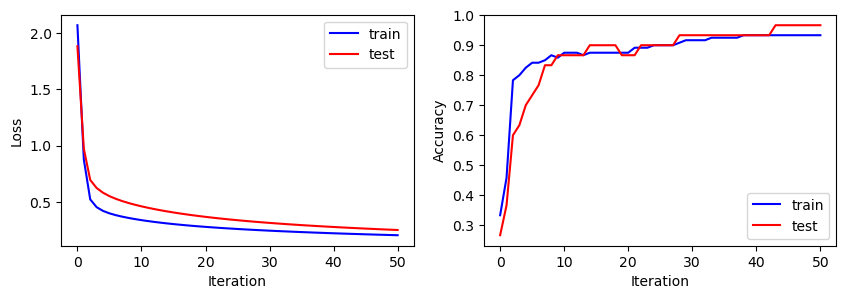

In [6]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(cce_train,color="blue",label="train")
plt.plot(cce_test,color="red",label="test")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(acc_train,color="blue",label="train")
plt.plot(acc_test,color="red",label="test")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()

plt.show()